<a href="https://colab.research.google.com/github/Gao-Mm/quant-work/blob/main/natural_gas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Gas Price Trend Analysis

Author: Ntebogan Gao Mmusi
Tools: Python, Pandas, scikit-learn, Matplotlib  
Objective: Model historical price trends and forecast future values.

This analysis examines historical natural gas prices to identify
long-term structural trends and assess the suitability of
linear models for commodity price forecasting.

Key Findings:
- Prices exhibit an overall upward trend over the sample period.
- Linear regression captures the structural trend but fails to
  account for volatility spikes and cyclical movements.
- Long-term projections using simple linear models should be
  interpreted cautiously.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
#upload data into dataframe
gas_df = pd.read_csv('//content//Nat_Gas.csv')
#convert date to ordinal for encoding for linear regression

gas_df["Dates"] = pd.to_datetime(
    gas_df["Dates"],
    format="%m/%d/%y"
)

# Encode dates numerically
gas_df["Dates_num"] = gas_df["Dates"].map(pd.Timestamp.toordinal)

X = gas_df[["Dates_num"]].values
y = gas_df["Prices"].values

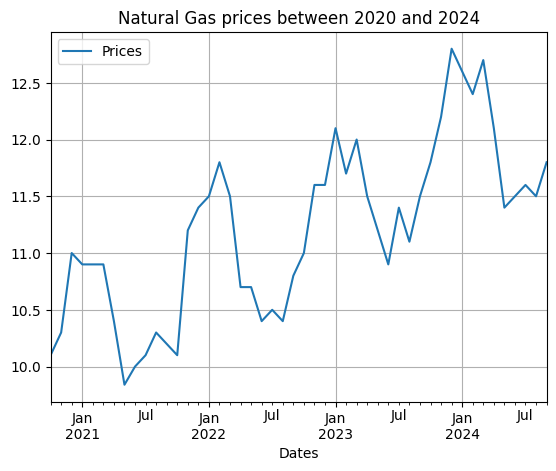

In [3]:
#visualise the data using a line graph
gas_df.plot(kind='line', grid=True, title="Natural Gas prices between 2020 and 2024",
             x="Dates", y="Prices")
#specify min & max for the axis
plt.show()

# LINE GRAPH ANALYSIS
The graph shows that the price of natural gas generally is increasing over time.
During the hot months in the west, the demand for gas is generally low as less people need to heat their homes compared to the peak winter months of January where demand is high, also pushing the price higher.

In [4]:
# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

LinearRegression()

In [5]:
# Make a prediction for Dec 2026
#encode future date
future_date = pd.to_datetime("12/31/26", format="%m/%d/%y")
future_date_num = future_date.toordinal()
#use linear regression model to predict
predicted_price = model.predict([[future_date_num]])
print(predicted_price)

[13.17894647]


# Analysis of Model
The predicted price for the future date is 13.2 which is expected based on the trend we see on the graph. This is called inference.
The model gives a simple scenario illustration and gives understanding of a long term direction.

# Linear Regression Limitations

While linear regression identifies the underlying long-term trend in natural gas prices, it does not model volatility clustering, seasonal effects, or structural market shocks. As a result, forward projections should be interpreted as illustrative rather than predictive.
